In [1]:
%%time
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

CPU times: user 36 µs, sys: 23 µs, total: 59 µs
Wall time: 62.5 µs


In [2]:
%%time
from WGE.graph_input import graph_input
from WGE.processing import Comprehensive_Processing
from WGE.plot import Plot_Total

CPU times: user 5.5 s, sys: 14.7 s, total: 20.2 s
Wall time: 15.6 s


In [3]:
N=1000
D=32
random_disturb=True


output_flag=True
num_cpus_n2v = 2

import multiprocessing
num_cpus = multiprocessing.cpu_count()

MU = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55]

graphs = {}
membership={}
between={}
remove_procedure={}
index={}
    
graphs, membership, between, remove_procedure, index = graph_input(N=N, MU=MU, random_disturb=True)

In [4]:
MEAN = {}
STD = {}

from tqdm.notebook import tqdm
# Initialize tqdm with the total number of iterations
progress_bar = tqdm(total=len(MU))

for mu in MU:
    MEAN[mu], STD[mu] = Comprehensive_Processing(output=output_flag, random_disturb=random_disturb, method=3, num_cpus=num_cpus, 
                                                 graph = graphs[mu], embedding_dimension=D, intrinsic_membership=membership[mu], 
                                                 remove_procedure=remove_procedure[mu], remove_procedure_index_form=index[mu], mu=mu)
    # Update the progress bar
    progress_bar.update(1)

# Close the progress bar
progress_bar.close()

  0%|          | 0/6 [00:00<?, ?it/s]

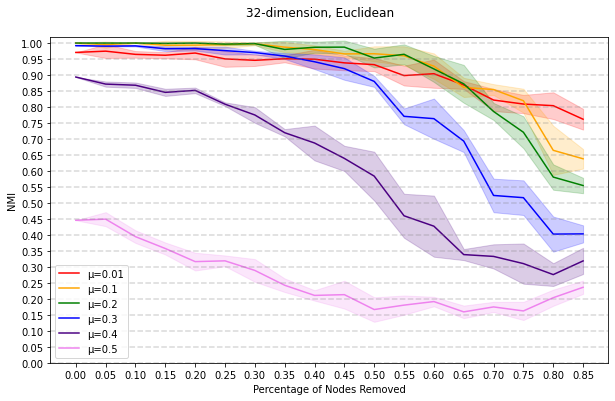

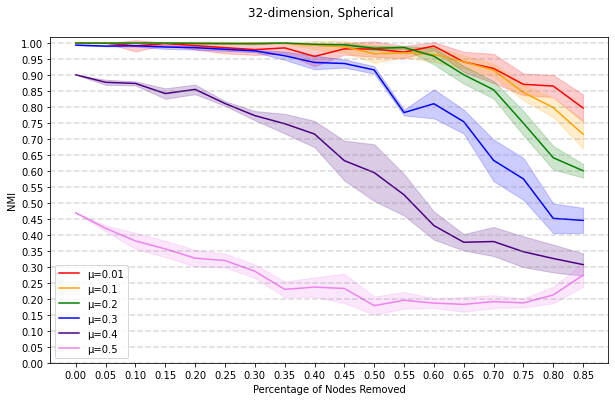

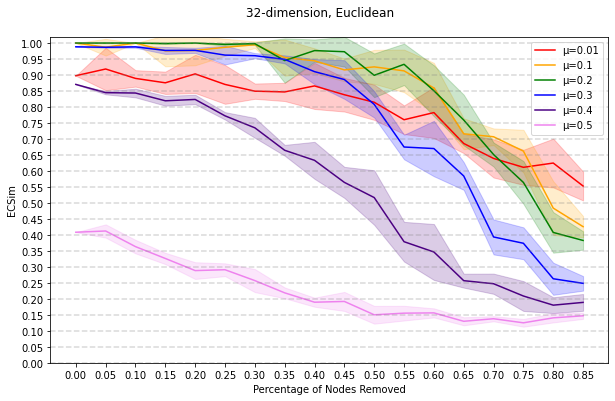

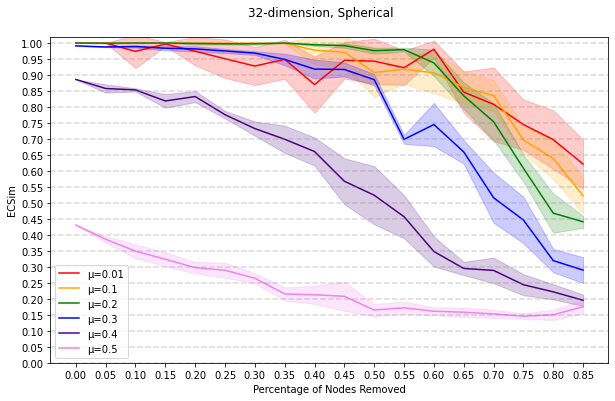

In [5]:
measurements = ["NMI", "NMI", "ECSim", "ECSim"]
tokens = ["Euclidean", "Spherical", "Euclidean", "Spherical"]

for tok in range(4):
    MEAN_Organized = []
    STD_Organized = []
    
    for i in range(18):
        mm = [mean[i][tok] for mean in MEAN.values()]
        MEAN_Organized.append(mm)
        
        ss = [std[i][tok] for std in STD.values()]
        STD_Organized.append(ss)
    
    measurement = measurements[tok]
    token = tokens[tok]

    Plot_Total(output=output_flag, random_disturb=random_disturb, measurement=measurement, 
               title=f"{D}-dimension, {token}", MEAN=MEAN_Organized, STD=STD_Organized, filename=f"{N}_{D}-dim_{token}_{measurement}")